<a href="https://colab.research.google.com/github/Paradox-3/CBIR/blob/main/CBIR_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# offline part

In [ ]:
# Import the libraries
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from pathlib import Path
from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np

print(4738,'images')
class FeatureExtractor:
    def __init__(self):
        # Use VGG-16 as the architecture and ImageNet for the weight
        base_model = VGG16(weights='imagenet')
        # Customize the model to return features from fully-connected layer
        self.model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)
    def extract(self, img):
        # Resize the image
        img = img.resize((224, 224))
        # Convert the image color space
        img = img.convert('RGB')
        # Reformat the image
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        # Extract Features
        feature = self.model.predict(x)[0]
        return feature / np.linalg.norm(feature)


# Iterate through images (Change the path based on your image location)
'''
for dirname, _, filenames in os.walk('/content/drive/MyDrive/CBIR_Dataset/CNN1'):
    for filename in filenames:
      print(filename)
      a = Image.open('/content/drive/MyDrive/CBIR_Dataset/CNN1/'+filename)
      feature = FeatureExtractor().extract(a)
      feature_path = "/content/drive/MyDrive/CBIR_Dataset/CNN1Out/.npy"
      np.save(feature_path, feature)'''
      

from PIL import Image
#from feature_extractor import FeatureExtractor
from pathlib import Path
import numpy as np
count = 0 
if __name__ == '__main__':
    fe = FeatureExtractor()

    for img_path in sorted(Path("/content/drive/MyDrive/CBIR_Dataset/CNN1").glob("*.jpg")):
        count+=1 
        feature = fe.extract(img=Image.open(img_path))
        feature_path = Path("/content/drive/MyDrive/CBIR_Dataset/CNN1Out/") / (img_path.stem + ".npy")  
        np.save(feature_path, feature)
    print(count)


# Online part

## Feature array mapping with images

In [11]:
fe = FeatureExtractor()
features = []
img_paths = []
for feature_path in Path("/content/drive/MyDrive/CBIR_Dataset/CNN1Out/").glob("*.npy"):
    features.append(np.load(feature_path))
    img_paths.append(Path("/content/drive/MyDrive/CBIR_Dataset/CNN1") / (feature_path.stem + ".jpg"))
features = np.array(features)

## Query and Retrival of best match

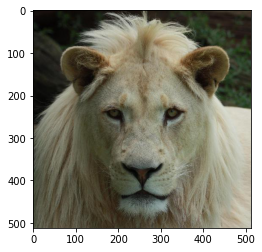

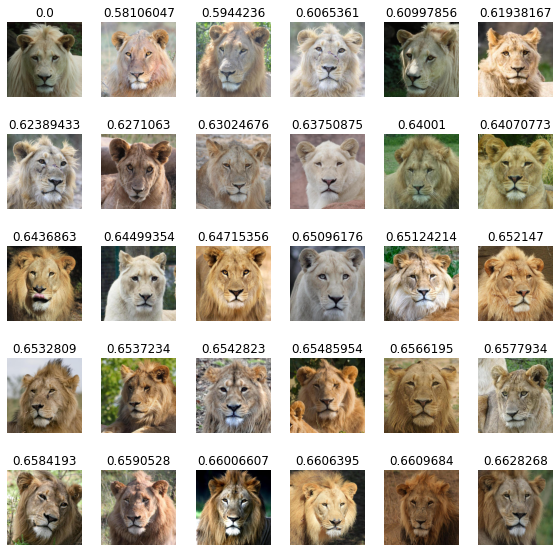

In [16]:
# Import the libraries
import matplotlib.pyplot as plt
import numpy as np
# Insert the image query
img = Image.open("/content/drive/MyDrive/CBIR_Dataset/Query/30.jpg")
plt.imshow(img)
# Extract its features
fe = FeatureExtractor()
query = fe.extract(img)
# Calculate the similarity (distance) between images
dists = np.linalg.norm(features - query, axis=1)
# Extract 30 images that have lowest distance
ids = np.argsort(dists)[:30]
scores = [(dists[id], img_paths[id]) for id in ids]
# Visualize the result
axes=[]
fig=plt.figure(figsize=(8,8))
for a in range(5*6):
    score = scores[a]
    axes.append(fig.add_subplot(5, 6, a+1))
    subplot_title=str(score[0])
    axes[-1].set_title(subplot_title)  
    plt.axis('off')
    plt.imshow(Image.open(score[1]))
fig.tight_layout()
plt.show()